Центральная предельная теорема
===

In [3]:
from scipy.stats import expon, norm
import plotly.graph_objects  as go
import numpy as np

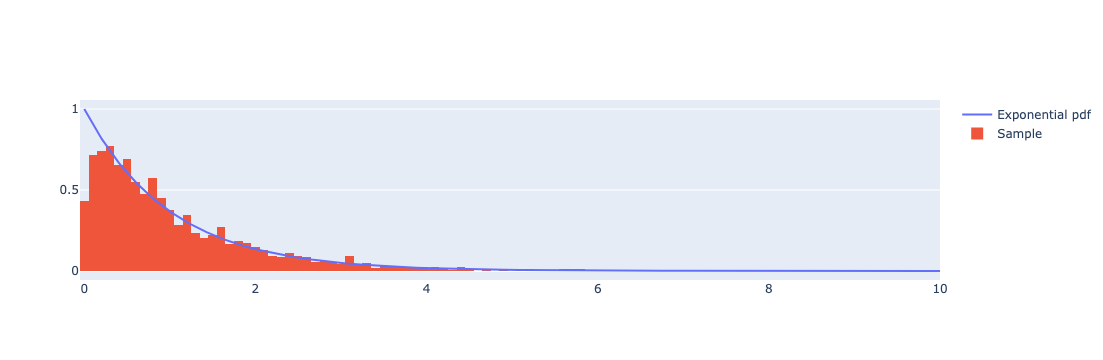

In [8]:
# exponential distribution
x = np.linspace(0,10)
y = expon.pdf(x)
sample = expon.rvs(size = 2000)

trace1 = go.Scatter(x=x,y=y, name = 'Exponential pdf')
trace2 = go.Histogram(x = sample, histnorm='probability density', name = 'Sample')
fig = go.Figure(data = [trace1, trace2])
fig.show()

In [9]:
sample.mean()

1.0390120329517163

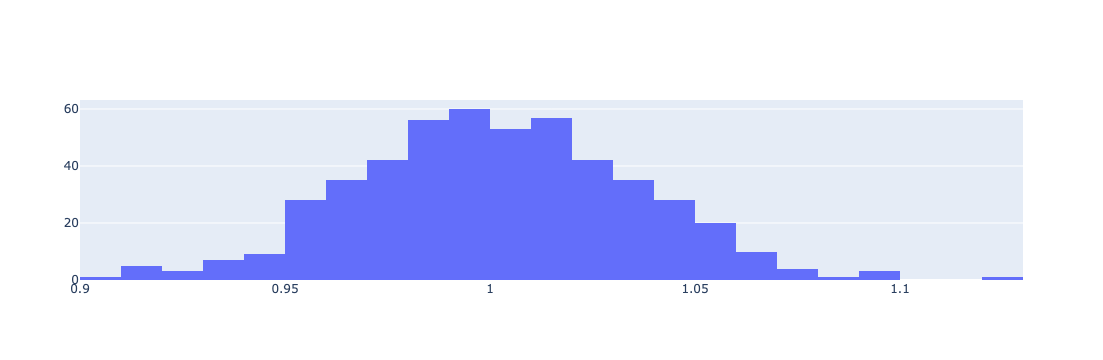

In [10]:
means = [expon.rvs(size = 1000).mean() for _ in range(500)]

fig = go.Figure(data = go.Histogram(x = means))
fig.show()

Создание выборочных распределений с помощью Python
==
Шаг 1: Импорт необходимых библиотек
--

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Шаг 2: Генерируем случайные выборки
--

In [12]:
# Параметры генеральной совокупности
mu = 50
sigma = 10

# Функция для генерации случайных выборок и вычисления выборочных средних
def generate_sample_means(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means



Шаг 3: Моделирование выборочных распределений
--

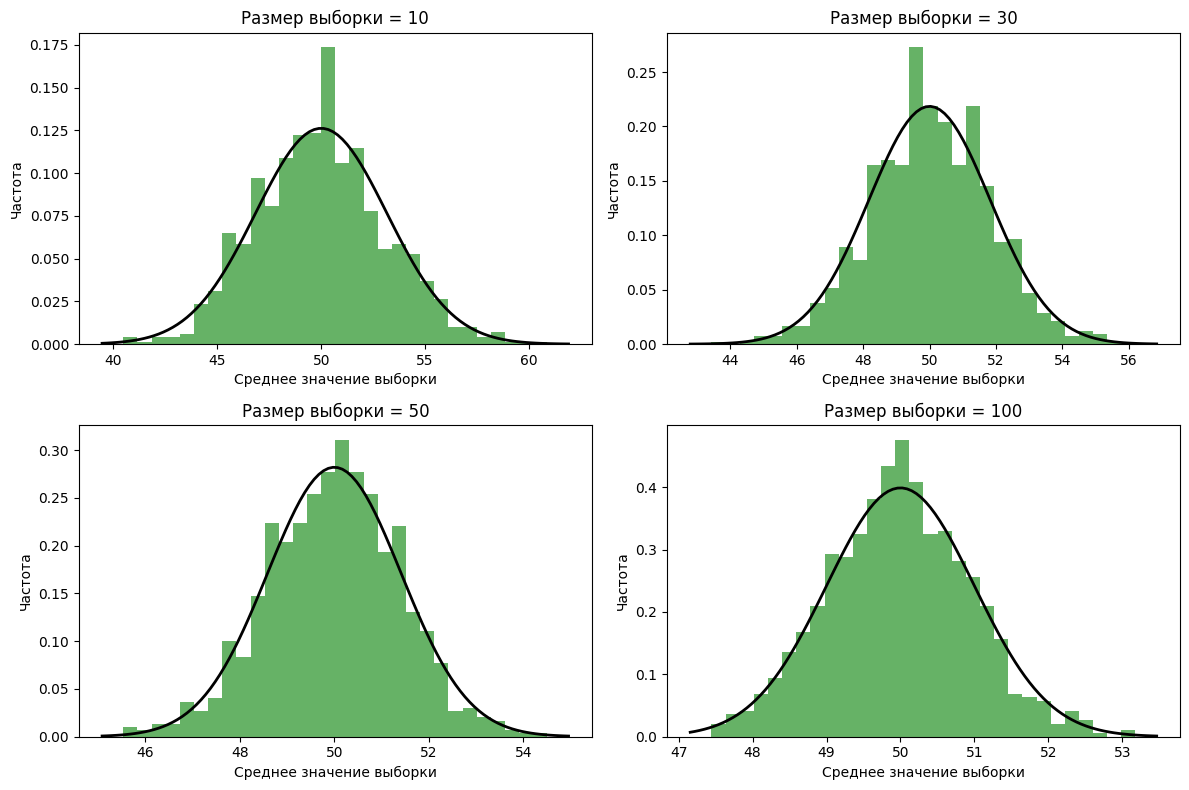

In [13]:
# Параметры для моделирования
sample_sizes = [10, 30, 50, 100]
num_samples = 1000

# Построение графиков выборочных распределений
plt.figure(figsize=(12, 8))

for i, sample_size in enumerate(sample_sizes):
    sample_means = generate_sample_means(sample_size, num_samples)
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Размер выборки = {sample_size}')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Частота')
    # Постройте график нормального распределения для сравнения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma/np.sqrt(sample_size))
    plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()


Решение задач
--
Предположим, что генеральная совокупность имеет среднее значение (𝜇), равное 100, и стандартное отклонение (𝜎), равное 15. Вы берете выборку из 36 наблюдений и хотите найти вероятность того, что среднее значение выборки находится в диапазоне от 95 до 105.


In [14]:

from scipy.stats import norm
import numpy as np

mu = 100  
sigma = 15 
n = 36 

sem = sigma / np.sqrt(n)

z_score_lower = (95 - mu) / sem
z_score_upper = (105 - mu) / sem

probability_lower = norm.cdf(z_score_lower)
probability_upper = norm.cdf(z_score_upper)

probability_between = probability_upper - probability_lower

print(f"Вероятность того, что выборочное среднее находится в диапазоне от 95 до 105, равна примерно {probability_between:.4f}")



Вероятность того, что выборочное среднее находится в диапазоне от 95 до 105, равна примерно 0.9545


Реализация Python для доверительных интервалов
==
Шаг 1: Импорт необходимых библиотек
--

In [15]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Шаг 2: Определите выборку
--

In [16]:
# Генерируем выборку
np.random.seed(0) # Для воспроизводимости
data = np.random.normal(loc=100, scale=15, size=50) # loc=mean, scale=std, size=размер выборки



Шаг 3: Рассчитайте доверительный интервал для небольшого размера выборки (n < 30) с помощью t-распределения
---

In [19]:
# Рассчитайте среднее значение и стандартную ошибку среднего
mean = np.mean(data)
sem = st.sem(data) # Стандартная ошибка среднего

# Определите доверительный интервал
alpha = 0.95

# Вычислить доверительный интервал
ci = st.t.interval(confidence=alpha, df=len(data)-1, loc=mean, scale=sem)

print(f"95% доверительный интервал (с использованием t-распределения): {ci}")



95% доверительный интервал (с использованием t-распределения): (97.26162554113152, 106.95515262826144)


Шаг 4: Вычислите доверительный интервал для большой выборки (n >= 30) с помощью нормального распределения
---

In [22]:
# Для больших наборов данных мы можем использовать нормальное распределение
ci_large = st.norm.interval(confidence=alpha, loc=mean, scale=sem)

print(f"95% доверительный интервал (с использованием нормального распределения): {ci_large}")



95% доверительный интервал (с использованием нормального распределения): (97.38127968170684, 106.83549848768612)


Шаг 5: Визуализация доверительных интервалов
--

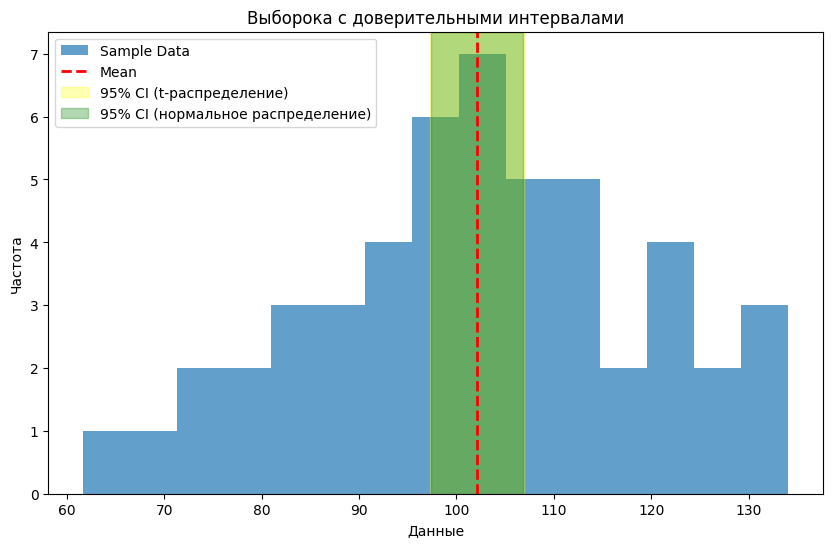

In [23]:
# Построение графика данных выборки
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.7, label='Sample Data')

# Построение графика среднего значения
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Выделение доверительного интервала
plt.axvspan(ci[0], ci[1], color='yellow', alpha=0.3, label='95% CI (t-распределение)')
plt.axvspan(ci_large[0], ci_large[1], color='green', alpha=0.3, label='95% CI (нормальное распределение)')

plt.xlabel('Данные')
plt.ylabel('Частота')
plt.title('Выборока с доверительными интервалами')
plt.legend()
plt.show()



Решение задач
--
Учитывая выборку из 50 растений со средней высотой выборки 19.24 дюйма и известным стандартным отклонением популяции в 10 дюймов, рассчитайте 95% доверительный интервал для средней высоты популяции.


In [24]:

import numpy as np
import scipy.stats as st

sample_mean = 19.24
population_std = 10
sample_size = 50
confidence_level = 0.95

z_critical = st.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (population_std / np.sqrt(sample_size))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")



95% Confidence Interval: (16.47, 22.01)


Учитывая выборку из 15 растений со средней высотой выборки 20.4 дюйма, рассчитайте 99%-ный доверительный интервал для средней высоты популяции, используя t-распределение.


In [25]:
sample_mean = 20.4  
sample_std = 5 
sample_size = 15
confidence_level = 0.99

t_critical = st.t.ppf((1 + confidence_level) / 2, df=sample_size-1)
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"99% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

99% Confidence Interval: (16.56, 24.24)


Учитывая данные выборки случайных целых чисел от 10 до 30 размером 50, рассчитайте и сравните доверительные интервалы 95% и 99%.


In [26]:
import numpy as np
import scipy.stats as st

np.random.seed(0)
data = np.random.randint(10, 30, 50)

sample_mean = np.mean(data)
sem = st.sem(data)

ci_95 = st.norm.interval(confidence=0.95, loc=sample_mean, scale=sem)

ci_99 = st.norm.interval(confidence=0.99, loc=sample_mean, scale=sem)

print(f"95% Confidence Interval: {ci_95}")
print(f"99% Confidence Interval: {ci_99}")

95% Confidence Interval: (17.400060940568054, 21.079939059431943)
99% Confidence Interval: (16.821910186405187, 21.65808981359481)
